Author: Pierce Rotman
Instructor: Pashaie
Course: CAP 
Date: 19 September 2023

Mini Project 2

Part 1: Single-layer perceptron. Here we train a single-layer perceptron ten different times to detect each digit 0-9. When the trained matrices were tested on the testing set, the following results were obtained (number tested: number of correct predictions): 
['0: 978', '1: 980', '2: 948', '3: 945', '4: 965', '5: 959', '6: 977', '7: 951', '8: 924', '9: 913'].
We clearly see that the model performs with >90% accuracy. The following graph shows which desired values were incorrectly predicted for each round:


['0: 978', '1: 980', '2: 948', '3: 945', '4: 965', '5: 959', '6: 977', '7: 951', '8: 924', '9: 913']


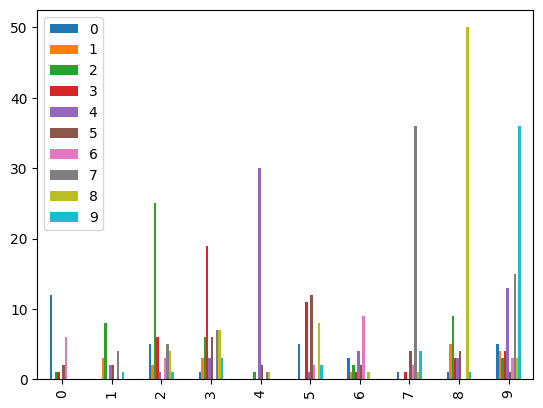

In [1]:
"""
Author: Pierce Rotman
Course: CAP 6673
Professor: Pashaie
Date: 19 September 2023

Description: Designs a single-layer perceptron to classify images of handwritten digits as either a value or not the value from 0-9.
            Checks the accuracy of the perceptron and graphs the incorrect values.
"""

#Imports
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

#Functions needed
def sgn(x):
    """
    Calculates value of sign function for an input
    Args:
        x (float): input value
    Returns:
        (int) value of sign function
    """
    if x[0] < 0:
        return -1
    elif x[0] > 0:
        return 1
    else:
        return 0

def weight_update(X, W, e):
    """
    Updates the weights matrix
    Args:
        X (numpy.ndarray): data at current iteration
        W (numpy.ndarray): weights matrix
        e (int): error value
    Returns:
        (numpy.ndarray): updated weights matrix
    """
    return W + 0.5*(e)*X


def train(value):
    """
    Trains single layer perceptron
    Args:
        value (int): desired value for training
    Returns:
        (numpy.ndarray): updated weights matrix
    """
    initial_weights = np.zeros((784, 1))
    desired_0 = np.zeros((5000,1))
    for i in range(5000):
        if digits['trainlabels'][i][0] == value:
            desired_0[i] = 1
        else:
            desired_0[i] = -1
    last100 = []
    weights = initial_weights
    round = 0
    while sum(last100) < 100 and round < 100:
                
        for k in range(5000):
            
            input = digits['train'][:,k].reshape(784,1)
            xTw = input.transpose().dot(weights)
            y = sgn(xTw)
            desired = desired_0[k][0]
            error = desired - y
            if error == 0:
                last100.append(1)
            else:
                last100.append(0)
            if len(last100) > 100:
                del last100[0]
            weights = weight_update(input, weights, error)
            
            #print(f"{value}: {sum(last100)}")

        round += 1 
    return weights

def test(value, weights):
    """
    Tests a weights matrix with the testing data for a desired value
    Args:
        value (int): desired testing value
        weights (numpy.ndarray): weights matrix
    Returns:
        correct (int): number of correct results
        failures (dict): dictionary of frequencies of failed desired values
    """
    failures = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
    desired_t_0 = np.zeros((1000, 1))
    for i in range(1000):
        if digits['testlabels'][i][0] == value:
            desired_t_0[i] = 1
        else:
            desired_t_0[i] = -1

    correct = 0
    for k in range(1000):
        input = digits['test'][:,k].reshape(784,1)
        xTw = input.transpose().dot(weights)
        y = sgn(xTw)
        desired = desired_t_0[k][0]
        error = desired - y
        if error == 0:
            correct += 1
        else:
            failures[digits['testlabels'][k][0]] += 1
    return correct, failures

digits = scipy.io.loadmat('/Users/piercerotman/Documents/MastersProgram/Machine_Learning/digits.mat')
Ws = []
Cs = []
kinds_incorrect = {}
for num in range(10):
    Ws.append(train(num))
    c, f = test(num, Ws[num])
    Cs.append(c)
    kinds_incorrect[num] = f
print([f"{val}: {Cs[val]}" for val in range(10)])
for i in range(10):
    Wim = Ws[i].reshape(28,28)
    image_test = Image.fromarray(Wim, 'L')
    image_test.save(f'{i}.png')
    #image_test.show()

df = pd.DataFrame(kinds_incorrect).T
fig, ax = plt.subplots()
df.plot(ax = ax, kind = 'bar')
plt.show()

As we can see, the most commonly mispredicted value is the desired value itself. Further, the desired values which are most commonly predicted incorrectly make sense. The number 2 and 7 are similar, and likely to be mixed up. Likewise with 4 and 9, and 3 and 8. These results intuitively make sense and are difficult to correct for with handwritten digits without a much larger training set. 
Below we have the images, in order, for the weights matrices for desired values 0-9. These images are not easy to understand. The white areas are positive values, which are likely to favor a desired result. As such, these positions have to be chosen so that they don’t conflict with, and thus get mixed up with, the pixels of other desired values. We can also see why some values are mixed up often. For example, the matrix image for 3 is very similar to the one for 8.

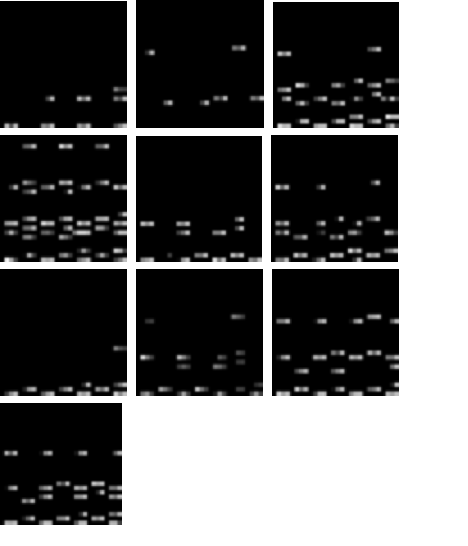


Part 2: Multi-layer perceptron. When we test this algorithm with 100 rounds of training through all 5000 training inputs, we get 77.9% accuracy on the testing phase, and the following incorrect values dictionary:
{0: 9, 1: 10, 2: 32, 3: 23, 4: 15, 5: 26, 6: 20, 7: 23, 8: 25, 9: 38}
These results are not so far off from the single layer, though the single layer is somewhat more accurate. However, by training the multi-level perceptron many times (say, 10000) we get much better results. However, the computing cost required for this is very high, and takes my laptop hours to complete. However, it allows us to get close to 90% accuracy.
In order to train the perceptron and get results, I had to choose a function to process the outputs, because using the sigmoid function will not yield perfect values of 0 or 1. I chose the numpy.argmax function after experimentation with argmax and setting a threshold of 0.5. Since argmax led to faster and more successful training, this is the function I choe.


In [3]:
"""
Author: Pierce Rotman
Course: CAP 6673
Professor: Pashaie
Date: 19 September 2023

Description: Trains a multi-layer perceptron for the identification of handwritten digits 0-9. Shows accuracy during training
and outputs incorrect values and accuracy in testing phase. 
"""

import numpy as np
import scipy.io


#Load Digits
digits = scipy.io.loadmat('/Users/piercerotman/Documents/MastersProgram/Machine_Learning/digits.mat')
np.random.seed(100)
X = np.zeros((784, 1,5000))
for k in range(5000):
    dummy = digits['train'][:,k]
    for i in range(784):
        X[i,0,k] = dummy[i]

W_inner = np.random.randn(784, 25).astype('float32')
W_outer = np.random.randn(25, 10).astype('float32')
desired = np.zeros((10, 5000), dtype='float32')
for k in range(5000):
    val = digits['trainlabels'][k]
    desired[val, k] = 1

def sigmoid(data):
    """
    Calculate sigmoid function for data
    Args:
        data (numpy.ndarray): input data
    Returns:
        sigmoid (numpy.ndarray):
    """
    return 1/(1+np.exp(-data*0.5))

def sigmoid_prime(data):
    """
    Calculate sigmoid derivative for data
    Args: 
        data (numpy.ndarray): input data
    Returns:
        sigmoid prime (numpy.ndarray): derivative of sigmoid for data
    """
    return sigmoid(data) * (1-sigmoid(data*0.5))


#Train
alpha = 0.005
mc = 1

overall_max = {'Round': 0, 'Alpha': 0, 'MC': 0, 'Correct': 0}
last_loss = 0
for run in range(100):
    loss = 0
    correct = 0
    for k in range(5000):
        #Forward
        data = X[:,:,k]

        inner_vector = data.transpose().dot(W_inner)
        inner_output = sigmoid(inner_vector)
        outer_vector = inner_output.dot(W_outer)
        output = sigmoid(outer_vector)

        #Error Calculation
        error = desired[:,k] - output

        #Loss calculation
        loss += 0.5 * np.sum(error ** 2)
        val = digits['trainlabels'][k][0]
        if np.argmax(output) == digits['trainlabels'][k][0]:
            correct += 1
        
        #Back propagation
        outer_delta = error * sigmoid_prime(outer_vector)
        inner_delta = sigmoid_prime(inner_vector) * (outer_delta.dot(W_outer.transpose()))


        #Update weights:
        W_outer = mc*W_outer + alpha * inner_output.transpose().dot(outer_delta)
        W_inner = mc*W_inner + alpha * data.dot(inner_delta)
    
    if (loss-last_loss)**2 < 0.00001:
        alpha = 0.01
    alpha = alpha / (1 + alpha * 0.00001)
    #print(f"Round: {run}, Loss: {loss}, Total Correct: {correct}")
    if correct >= 4800:
        break
    last_loss = loss

#test
Xtest = np.zeros((784,1,1000))
for k in range(1000):
    dummy = digits['test'][:,k]
    for i in range(784):
        Xtest[i,0,k] = dummy[i]

correct = 0
kind_incorrect = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

correct_predictions = 0
kind_incorrect2 = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for k in range(1000):
    #Forward
    data = Xtest[:,:,k]
    inner_vector = data.transpose().dot(W_inner)
    inner_output = sigmoid(inner_vector)
    outer_vector = inner_output.dot(W_outer)
    y = sigmoid(outer_vector)

    if np.argmax(y) == digits['testlabels'][k][0]:
        correct += 1
    else:
        kind_incorrect[digits['testlabels'][k][0]] += 1

print(f"{100*correct/1000}%") 
print(kind_incorrect)

(5000, 1)


/var/folders/j5/lrpp64vx7jn7nc9jfp67z37r0000gn/T/ipykernel_395/1372147535.py:39: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-data*0.5))


77.9%
{0: 9, 1: 10, 2: 32, 3: 23, 4: 15, 5: 26, 6: 20, 7: 23, 8: 25, 9: 38}
